In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 7)

In [92]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [93]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,1
1,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,1
2,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
3,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
4,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61315,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61316,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61317,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61318,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


# Exploratory data analysis

In [94]:
data.shape

(61320, 12)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 61320 non-null  int64  
 1   gender             61320 non-null  object 
 2   age                61320 non-null  float64
 3   hypertension       61320 non-null  int64  
 4   heart_disease      61320 non-null  int64  
 5   ever_married       61320 non-null  object 
 6   work_type          61320 non-null  object 
 7   Residence_type     61320 non-null  object 
 8   avg_glucose_level  61320 non-null  float64
 9   bmi                58908 non-null  float64
 10  smoking_status     61320 non-null  object 
 11  stroke             61320 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.6+ MB


In [96]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2412
smoking_status          0
stroke                  0
dtype: int64

# Lets fill Null Values

In [97]:
data['bmi'].value_counts()

28.7    492
28.4    456
27.7    444
27.6    444
26.7    444
       ... 
57.9     12
48.1     12
52.9     12
11.5     12
13.0     12
Name: bmi, Length: 418, dtype: int64

In [98]:
data['bmi'].describe()

count    58908.000000
mean        28.893237
std          7.853333
min         10.300000
25%         23.500000
50%         28.100000
75%         33.100000
max         97.600000
Name: bmi, dtype: float64

In [99]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [100]:
data['bmi'].describe()

count    61320.000000
mean        28.893237
std          7.697327
min         10.300000
25%         23.800000
50%         28.400000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

In [101]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [102]:
data.drop('id',axis=1,inplace=True)

In [103]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,1
1,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,1
2,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
3,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
4,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
61315,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61316,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61317,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
61318,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


# Outlier Removation

In [104]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

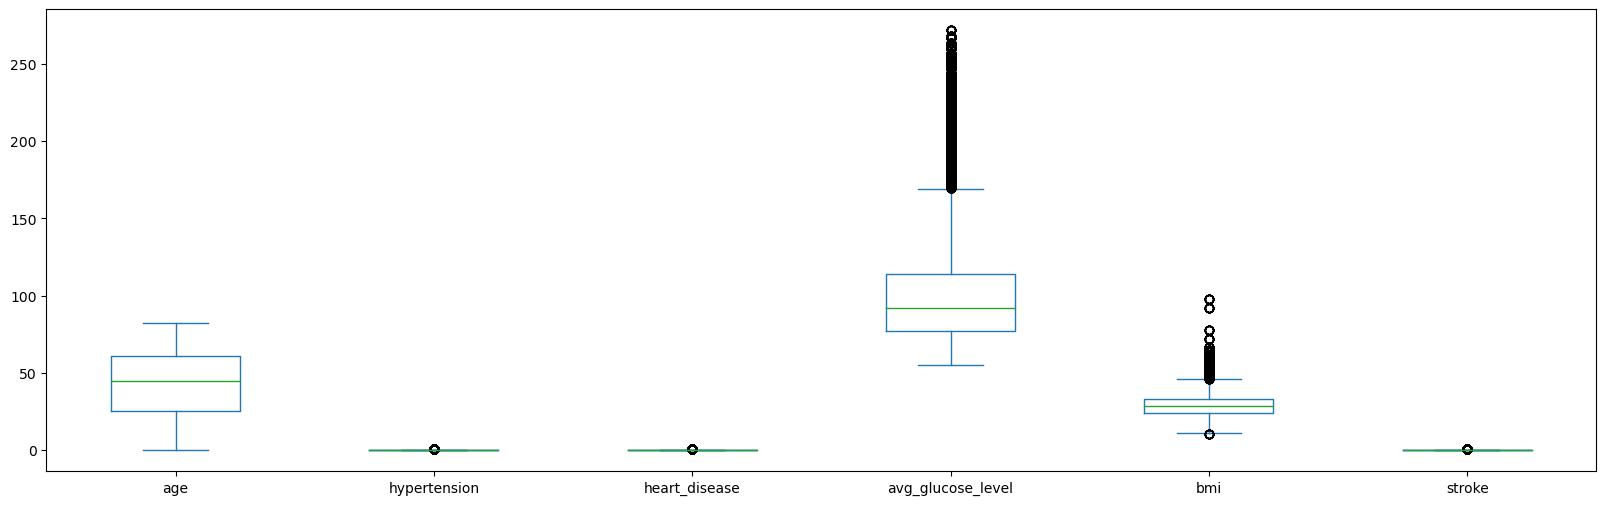

In [105]:
fig, ax = plt.subplots(figsize=(20, 6))
data.plot(kind='box', ax=ax)
plt.show()

In [106]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]

In [107]:
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['avg_glucose_level'] >= lower_bound) & (data['avg_glucose_level'] <= upper_bound)]

In [177]:
data.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
204,1,82.0,0,0,0,3,1,161.95,30.8,2,1
205,1,82.0,0,0,0,3,1,161.95,30.8,2,1
206,1,82.0,0,0,0,3,1,161.95,30.8,2,0
207,1,82.0,0,0,0,3,1,161.95,30.8,2,0
208,1,82.0,0,0,0,3,1,161.95,30.8,2,0
209,1,82.0,0,0,0,3,1,161.95,30.8,2,0
210,1,82.0,0,0,0,3,1,161.95,30.8,2,0
211,1,82.0,0,0,0,3,1,161.95,30.8,2,0
212,1,82.0,0,0,0,3,1,161.95,30.8,2,0
213,1,82.0,0,0,0,3,1,161.95,30.8,2,0


# Data Visulaization

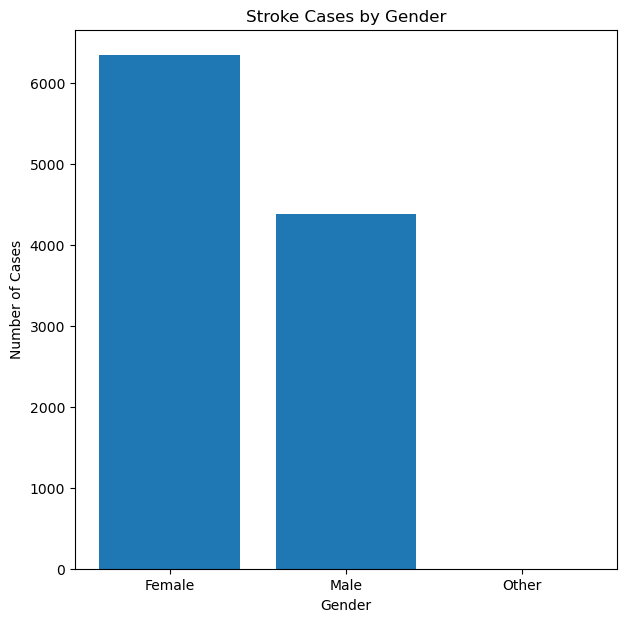

In [108]:
gender_stroke_counts = data[data['stroke'] == 1]['gender'].value_counts()
plt.bar(gender_stroke_counts.index, gender_stroke_counts.values)
plt.title('Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

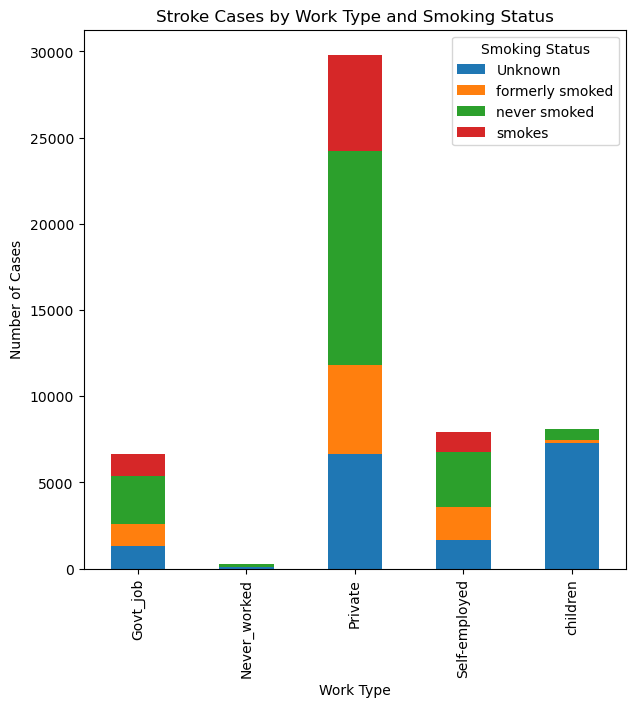

In [109]:
# Create a stacked bar chart of stroke cases by work type and smoking status
work_type_counts = data['work_type'].value_counts()
smoking_counts = data['smoking_status'].value_counts()
work_smoking_counts = data.groupby(['work_type', 'smoking_status'])['stroke'].count().unstack()
work_smoking_counts.plot(kind='bar', stacked=True)
plt.title('Stroke Cases by Work Type and Smoking Status')
plt.xlabel('Work Type')
plt.ylabel('Number of Cases')
plt.legend(title='Smoking Status')
plt.show()

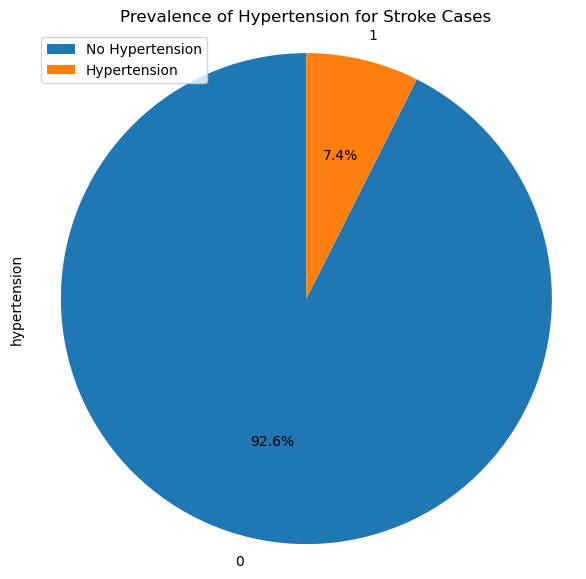

In [175]:
# Create a pie chart of hypertension prevalence for stroke cases
hypertension_data = data['hypertension'].value_counts()
hypertension_data.plot(kind='pie', autopct='%1.1f%%',
                       startangle=90)
plt.title('Prevalence of Hypertension for Stroke Cases')
plt.axis('equal')
plt.legend(['No Hypertension', 'Hypertension'])
plt.show()

# Label Encoding

In [112]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
204,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,1
205,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,1
206,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
207,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
208,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0


In [113]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [114]:
gender=enc.fit_transform(data['gender'])

In [115]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [116]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [117]:
data['work_type']=work_type

In [118]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [119]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
204,1,82.00,0,0,0,3,1,161.95,30.8,2,1
205,1,82.00,0,0,0,3,1,161.95,30.8,2,1
206,1,82.00,0,0,0,3,1,161.95,30.8,2,0
207,1,82.00,0,0,0,3,1,161.95,30.8,2,0
208,1,82.00,0,0,0,3,1,161.95,30.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...
61315,1,0.08,0,0,0,4,0,70.33,16.9,0,0
61316,1,0.08,0,0,0,4,0,70.33,16.9,0,0
61317,1,0.08,0,0,0,4,0,70.33,16.9,0,0
61318,1,0.08,0,0,0,4,0,70.33,16.9,0,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52680 entries, 204 to 61319
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             52680 non-null  int32  
 1   age                52680 non-null  float64
 2   hypertension       52680 non-null  int64  
 3   heart_disease      52680 non-null  int64  
 4   ever_married       52680 non-null  int32  
 5   work_type          52680 non-null  int32  
 6   Residence_type     52680 non-null  int32  
 7   avg_glucose_level  52680 non-null  float64
 8   bmi                52680 non-null  float64
 9   smoking_status     52680 non-null  int32  
 10  stroke             52680 non-null  int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 3.8 MB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [121]:
X=data.drop('stroke',axis=1)

In [122]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
204,1,82.0,0,0,0,3,1,161.95,30.8,2
205,1,82.0,0,0,0,3,1,161.95,30.8,2
206,1,82.0,0,0,0,3,1,161.95,30.8,2
207,1,82.0,0,0,0,3,1,161.95,30.8,2
208,1,82.0,0,0,0,3,1,161.95,30.8,2


In [123]:
Y=data['stroke']

In [124]:
Y

204      1
205      1
206      0
207      0
208      0
        ..
61315    0
61316    0
61317    0
61318    0
61319    0
Name: stroke, Length: 52680, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [126]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
43839,0,28.0,0,0,1,2,0,131.80,30.3,2
27256,0,49.0,0,0,1,3,0,68.44,23.0,3
45596,0,26.0,0,0,0,2,0,78.16,20.1,2
50145,0,19.0,0,0,0,2,1,76.57,26.6,0
19188,0,57.0,0,0,1,2,0,77.93,21.7,2
...,...,...,...,...,...,...,...,...,...,...
35277,1,40.0,0,0,1,2,0,56.07,26.6,2
59100,0,3.0,0,0,0,4,1,73.20,16.8,0
36663,1,38.0,0,0,0,2,0,86.86,36.5,0
48377,0,22.0,0,0,0,2,1,63.37,26.5,2


In [127]:
Y_train

43839    0
27256    0
45596    0
50145    0
19188    1
        ..
35277    0
59100    1
36663    0
48377    0
23397    1
Name: stroke, Length: 42144, dtype: int64

In [128]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
51158,1,17.0,0,0,0,1,1,113.25,23.400000,2
51881,0,16.0,0,0,0,2,1,122.26,34.200000,2
35449,1,39.0,1,0,1,2,0,111.24,38.800000,2
53369,0,14.0,0,0,0,4,0,78.09,26.400000,0
2632,0,79.0,0,0,1,2,1,97.93,31.200000,0
...,...,...,...,...,...,...,...,...,...,...
15882,1,60.0,0,0,1,2,0,153.48,37.300000,2
9277,0,69.0,1,0,1,0,1,112.20,28.893237,2
48488,1,21.0,0,0,0,2,1,138.51,24.300000,2
9533,0,69.0,0,0,1,3,1,80.85,29.300000,1


In [129]:
Y_test

51158    0
51881    0
35449    1
53369    0
2632     0
        ..
15882    0
9277     1
48488    0
9533     0
45107    0
Name: stroke, Length: 10536, dtype: int64

# Normalize

In [130]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000,52680.000000
mean,0.410251,40.887271,0.074260,0.039180,0.623007,2.201139,0.507745,91.459481,27.812404,1.345558,0.203455
std,0.492347,22.536435,0.262196,0.194025,0.484638,1.110059,0.499945,22.632675,6.561968,1.085091,0.402572
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,75.070000,23.200000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.040000,27.650000,2.000000,0.000000
75%,1.000000,58.000000,0.000000,0.000000,1.000000,3.000000,1.000000,104.020000,31.900000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,168.150000,46.200000,3.000000,1.000000


In [131]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [132]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [133]:
import pickle
import os


In [134]:
scaler_path=os.path.join('models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [135]:
X_train_std

array([[-0.83300195, -0.57169072, -0.28397728, ...,  1.78673206,
         0.37743116,  0.59876566],
       [-0.83300195,  0.36005208, -0.28397728, ..., -1.01851657,
        -0.73458092,  1.51868764],
       [-0.83300195, -0.66042813, -0.28397728, ..., -0.58816592,
        -1.17633914,  0.59876566],
       ...,
       [ 1.19812708, -0.12800367, -0.28397728, ..., -0.20297554,
         1.32187977, -1.2410783 ],
       [-0.83300195, -0.83790295, -0.28397728, ..., -1.24298959,
        -0.20142444,  0.59876566],
       [-0.83300195,  0.5375269 ,  3.52140852, ..., -1.27929489,
         0.37743116, -1.2410783 ]])

In [136]:
X_test_std

array([[ 1.19812708, -1.05974647, -0.28397728, ...,  0.96543531,
        -0.67364875,  0.59876566],
       [-0.83300195, -1.10411518, -0.28397728, ...,  1.36435087,
         0.9715198 ,  0.59876566],
       [ 1.19812708, -0.08363497,  3.52140852, ...,  0.87644305,
         1.67223974,  0.59876566],
       ...,
       [ 1.19812708, -0.88227165, -0.28397728, ...,  2.08381568,
        -0.53655137,  0.59876566],
       [-0.83300195,  1.24742618, -0.28397728, ..., -0.46906683,
         0.22510074, -0.32115632],
       [-0.83300195, -0.66042813, -0.28397728, ...,  3.39611948,
        -0.74981396,  0.59876566]])

# Training

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [138]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [139]:
dt.feature_importances_

array([0.04761879, 0.17496718, 0.0260087 , 0.02485611, 0.0200912 ,
       0.05269442, 0.02234518, 0.34117418, 0.23826895, 0.05197529])

In [140]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [141]:
Y_pred=dt.predict(X_test_std)

In [142]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [145]:
ac_dt

0.8322892938496583

In [146]:
import joblib
model_path=os.path.join('models/dt.sav')
joblib.dump(dt,model_path)

['models/dt.sav']

# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [148]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [149]:
Y_pred_lr=lr.predict(X_test_std)

In [150]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [152]:
ac_lr

0.7945140470766895

# KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [154]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [155]:
Y_pred=knn.predict(X_test_std)

c:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [156]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [157]:
ac_knn

0.8304859529233105

# Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [159]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [160]:
Y_pred=rf.predict(X_test_std)

In [161]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [162]:
ac_rf

0.8322892938496583

In [163]:
ac_knn

0.8304859529233105

In [164]:
ac_dt

0.8322892938496583

In [165]:
ac_lr

0.7945140470766895

# SVM

In [166]:
from sklearn.svm import SVC

In [167]:
sv=SVC()

In [168]:
sv.fit(X_train_std,Y_train)

SVC()

In [169]:
Y_pred=sv.predict(X_test_std)

In [170]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [171]:
ac_sv

0.7987851176917237

In [172]:
ac_lr

0.7945140470766895

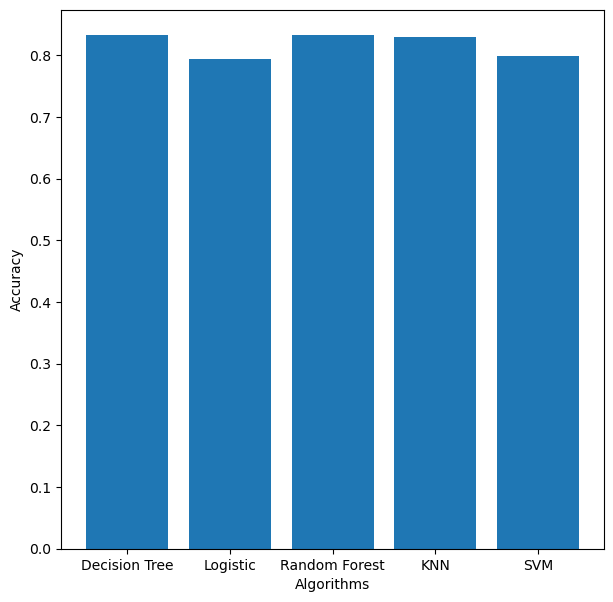

In [173]:
plt.bar(['Decision Tree','Logistic','Random Forest','KNN','SVM'],[ac_dt,ac_lr,ac_rf,ac_knn,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [174]:
print("Accuracy of Decision Tree: ", ac_dt)
print("Accuracy of Logistic Regression: ", ac_lr)
print("Accuracy of Random Forest: ", ac_rf)
print("Accuracy of KNN: ", ac_knn)
print("Accuracy of SVM: ", ac_sv)


Accuracy of Decision Tree:  0.8322892938496583
Accuracy of Logistic Regression:  0.7945140470766895
Accuracy of Random Forest:  0.8322892938496583
Accuracy of KNN:  0.8304859529233105
Accuracy of SVM:  0.7987851176917237
